# WWCode Emerging Tech Week 3 Challenge
## Titanic Kaggle Dataset (XGBoost vs Multi-Layer Perceptron NN)

By: Angela Cao

## Upload Training Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory Data Analysis (EDA) (on Training Dataset)

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
import plotly.express as px

age_series = train_df['Age']
age_series.name = 'Age'
fig = px.histogram(age_series, title='Distribution of Age of Titanic Passengers')
fig.update_xaxes(title='Age')
fig.show()

The distribution of the age of Titanic passengers recorded is normal-ish with a right skew which indicates mean (of the age of Titanic passengers) > median (of the age of Titanic passengers). A good chunk of titanic passengers recorded are fairly young.

In [8]:
px.box(age_series, y='Age')

The median age of Titanic passengers recorded is in the late 20's (28) while any age above 65 is considered an outlier.

In [9]:
age_series.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The oldest passenger on the Titanic recorded by the dataset is 80 while the youngest has not turned a year old yet. The standard deviation is of an age of a teenager indicating some range of ages on the Titanic.

In [10]:
embarked_groups = train_df.groupby('Embarked').count()['PassengerId']
embarked_groups.name = 'Port of Embarkation'
fig = px.bar(embarked_groups, title='Distribution of Port of Embarkation')
fig.update_xaxes(title='Port of Embarkation').update_yaxes(title='Count')
fig

The vast majority of passengers on the Titanic recorded are embarked to the S port while a smaller fraction of passengers recorded are embarked to the C port followed by the Q port.

In [11]:
pclass_groups = train_df.groupby('Pclass').count()['PassengerId']
pclass_groups.name = 'Passenger Class'
fig = px.bar(pclass_groups, title='Distribution of Passenger Class')
fig.update_yaxes(title='Count')
fig.show()

The majority of passengers on the Titanic recorded are 3rd class passengers followed by 1st class passengers and then 2nd class passengers.

In [12]:
sex_groups = train_df.groupby('Sex').count()['PassengerId']
sex_groups.name = 'Sex'
fig = px.bar(sex_groups, title='Distribution of Sex')
fig.update_yaxes(title='Count')
fig

The majority (over 50%) of the Titanic passengers recorded are male.

In [13]:
fare_series = train_df['Fare']
fare_series.name = 'Fare'
fig = px.histogram(fare_series, title='Distribution of Fare')
fig.update_xaxes(title='Fare')
fig.show()

The distribution of fare for the Titanic is very right-skewed which indicates mean (of the fare) > median (of the fare).

In [14]:
px.box(fare_series, y='Fare')

Any fare price past 31 is considered an outlier, but the obvious outlier according to this box plot graph is the fare price of approximately 512 (probably belongs to someone in 1st class).

In [15]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The minimum fare of a passenger on the Titanic recorded is 0 (for free, most likely an employee on the Titanic) and the maximum fare of a passenger on the Titanic recorded is 512.3292 (which is more than 10 times the 75% percentile fare price). The standard deviation of fare prices on the Titanic is fairly significant (could be the fare price of someone's ticket and even larger than all of the fare prices within the interquartile range) indicating that there is a fairly large range of fare prices of the Titanic.

In [16]:
sibsp_series = train_df['SibSp']
sibsp_series.name = 'Number of Siblings/Spouses (each Passenger)'
fig = px.histogram(sibsp_series, title='Distribution of Number of Siblings/Spouses of each Passenger abroad the Titanic')
fig.update_xaxes(title='Number of Siblings/Spouses (each Passenger)')
fig.show()

In [17]:
px.box(sibsp_series, y='Number of Siblings/Spouses (each Passenger)')

As the number of siblings/spouses for each passenger increases, the number of passengers for each number decreases. Most passengers are traveling by themselves or with another person (most likely a spouse). It seems that according to the dataset, there are not that many large families traveling on the Titanic recorded.

In [18]:
parch_series = train_df['Parch']
parch_series.name = 'Number of Parents/Children (each Passenger)'
fig = px.histogram(parch_series, title='Distribution of Number of Parents/Children of each Passenger abroad the Titanic')
fig.update_xaxes(title='Number of Parents/Children (each Passenger)')
fig.show()

In [19]:
px.box(parch_series, y='Number of Parents/Children (each Passenger)')

Like the above distribution, as the number of parents or children for each passenger increases, the number of passengers for each number decreases. Most passengers are traveling by themselves or with 1-2 other passengers (for children, most likely their parents). Like the above distribution, this can suggest that there are not a lot of large families traveling on the Titanic recorded.

In [20]:
survived_groups = train_df.groupby('Survived').count()['PassengerId']
survived_groups.name = 'Survived Classificaton'
fig = px.bar(survived_groups, title='Distribution of Survived')
fig.update_yaxes(title='Count')
fig

Over half of the passengers on the Titanic recorded did not survive indicating a slightly imbalanced dataset (maybe not all passengers were recorded and a solution to balance the dataset is to record more passengers, especially those who survived).

In [21]:
len(train_df['Ticket'].unique())

681

In [22]:
len(train_df['Cabin'].unique())

148

## Data Cleaning and Wrangling on Training Dataset

In [23]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [24]:
#train_df['Embarked'] = train_df['Embarked'].fillna('S')
#train_df

In [25]:
fare_median = train_df['Fare'].median()
# https://www.geeksforgeeks.org/pandas-cut-continuous-to-categorical/
train_df['Age'] = pd.cut(train_df['Age'], bins=[0, 3, 17, 63, 99], labels=['Baby/Toddler', 'Child', 'Adult', 'Elderly'])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,Adult,1,0,7.2500,S
1,1,1,female,Adult,1,0,71.2833,C
2,1,3,female,Adult,0,0,7.9250,S
3,1,1,female,Adult,1,0,53.1000,S
4,0,3,male,Adult,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,13.0000,S
887,1,1,female,Adult,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,Adult,0,0,30.0000,C


In [26]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Age', 'Pclass'])
train_df

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,1
1,1,1,0,71.2833,1,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,7.9250,1,0,0,0,1,0,0,1,0,0,0,1
3,1,1,0,53.1000,1,0,0,0,1,0,0,1,0,1,0,0
4,0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,1,0,0,1,0,0,1,0,0,1,0
887,1,0,0,30.0000,1,0,0,0,1,0,0,1,0,1,0,0
888,0,1,2,23.4500,1,0,0,0,1,0,0,0,0,0,0,1
889,1,0,0,30.0000,0,1,1,0,0,0,0,1,0,1,0,0


## Statistical Analysis (on Training Dataset)

### Correlation

In [27]:
train_df.corr()['Survived']

Survived            1.000000
SibSp              -0.035322
Parch               0.081629
Fare                0.257307
Sex_female          0.543351
Sex_male           -0.543351
Embarked_C          0.168240
Embarked_Q          0.003650
Embarked_S         -0.155660
Age_Baby/Toddler    0.108558
Age_Child           0.072585
Age_Adult           0.011219
Age_Elderly        -0.076793
Pclass_1            0.285904
Pclass_2            0.093349
Pclass_3           -0.322308
Name: Survived, dtype: float64

<Axes: >

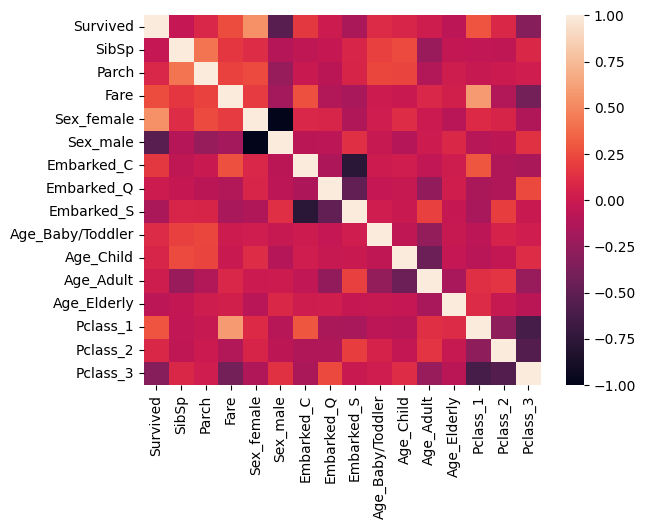

In [28]:
import seaborn as sns

sns.heatmap(train_df.corr())

Correlation insights:

* According to the correlation matrix (heatmap), the sex of the
passenger is the strongest factor in determining whether the passenger has survived or not (though correlation is moderate, more or less). Females are more likely to survive from the Titanic while males are more likely to perish or less likely to survive from the Titanic (according to the dataset).

* Sex_male and Sex_female have a direct and strong correlation with each other (-1.0) which means that they are directly correlated with each other (a male is not a female and vice versa).

* The passenger class also plays somewhat of a noticeable factor (though not as strong or strong) in determining whether the passenger survives from the Titanic or not, especially from 1st or 3rd class. 1st class passengers are more likely to survive from the Titanic while 3rd class passengers are more likely to perish or less likely to survive from the Titanic (according to the dataset).

* Fare and passenger class(es) are also noticeably correlated with each other as well: the higher the fare, the more prestigious (closer or exactly to 1st class) the passenger class is, and likewise, the lower the fare, the less prestigious (closer or exactly to 3rd class) the passenger class is.

* Fare also plays somewhat of a noticeable factor (though not as strong or strong) in determining whether the passenger survives from the Titanic or not: the higher the fare, the more likely the passenger will survive from the Titanic. Considering the correlation between fare and passenger classes, this can likely tie to the insight that more prestigious passengers (closer or exactly 1st class) are more likely to survive from the Titanic.

* Embarked_C (Port of Embarkation C) is strongly correlated to Embarked_S (Port of Embarkation S), and also moderately correlated to Embarked_Q (the number of passengers per port of embarkation can play a role in that correlation as there is definitely most evidence of port of embarkation C and more evidence of port of embarkation S than evidence of port of embarkation Q).



### Hypothesis Testing (of Normal Distribution of Continuous/Numerical Factors)

***H_0***: The distribution is normally distributed.

***H_a***: The distribution is not normally distributed.

Text(0.5, 1.0, 'QQ Plot of Fare')

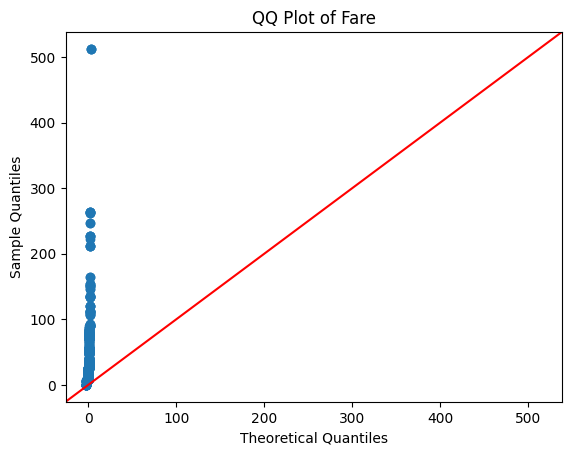

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(train_df['Fare'], line='45')
plt.title('QQ Plot of Fare')

In [30]:
from scipy import stats

p_value_fare = stats.normaltest(train_df['Fare'])[1]
p_value_fare

3.727091062842147e-197

According to the QQ Plot (the direction of the blue points altogether do not line up with the red diagonal line) and p-value above, under alpha = 0.05, we reject the null hypothesis and accept the alternative hypothesis that indicates there is strong evidence that the distribution of Fare is not normally distributed.

Text(0.5, 1.0, 'QQ Plot of SibSp')

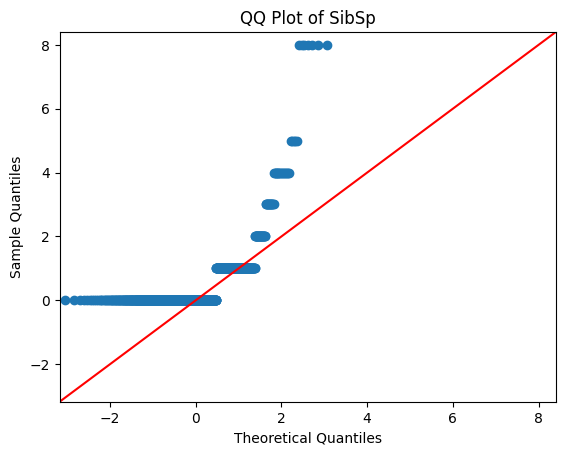

In [31]:
sm.qqplot(train_df['SibSp'], line='45')
plt.title('QQ Plot of SibSp')

In [32]:
p_value_sibsp = stats.normaltest(train_df['SibSp'])[1]
p_value_sibsp

1.0712617667710052e-157

According to the QQ Plot (the direction of the blue points altogether do not line up with the red diagonal line) and p-value above, under alpha = 0.05, we reject the null hypothesis and accept the alternative hypothesis that indicates there is strong evidence that the distribution of SibSp (Number of Siblings/Spouses per passenger) is not normally distributed.

Text(0.5, 1.0, 'QQ Plot of Parch')

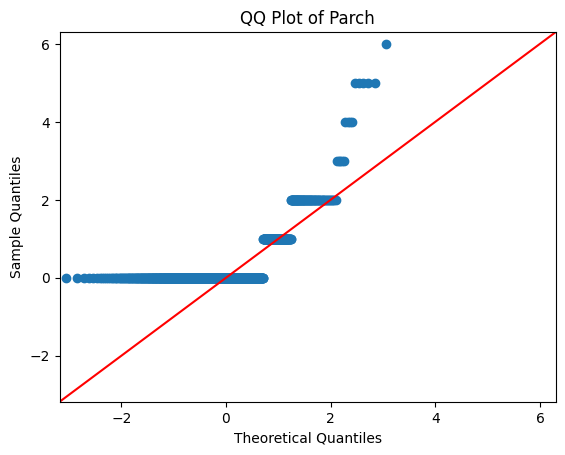

In [33]:
sm.qqplot(train_df['Parch'], line='45')
plt.title('QQ Plot of Parch')

In [34]:
p_value_parch = stats.normaltest(train_df['Parch'])[1]
p_value_parch

1.2061095353353198e-118

According to the QQ Plot (the direction of the blue points altogether do not line up with the red diagonal line) and p-value above, under alpha = 0.05, we reject the null hypothesis and accept the alternative hypothesis that indicates there is strong evidence that the distribution of Parch (Number of Parents/Children per passenger) is not normally distributed.

## Continual Data Cleaning and Wrangling (on Training Dataset)

Since none of the continuous/numerical variables are (strongly) normally distributed according to the hypothesis tests above, must use StandardScaler to standardize the features.

In [35]:
from sklearn.preprocessing import StandardScaler

fare_standard_scaler = StandardScaler()
train_df['Fare'] = fare_standard_scaler.fit_transform(np.array(train_df['Fare'].values).reshape(-1, 1))
train_df

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,-0.502445,0,1,0,0,1,0,0,1,0,0,0,1
1,1,1,0,0.786845,1,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,-0.488854,1,0,0,0,1,0,0,1,0,0,0,1
3,1,1,0,0.420730,1,0,0,0,1,0,0,1,0,1,0,0
4,0,0,0,-0.486337,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,-0.386671,0,1,0,0,1,0,0,1,0,0,1,0
887,1,0,0,-0.044381,1,0,0,0,1,0,0,1,0,1,0,0
888,0,1,2,-0.176263,1,0,0,0,1,0,0,0,0,0,0,1
889,1,0,0,-0.044381,0,1,1,0,0,0,0,1,0,1,0,0


In [36]:
sibsp_standard_scaler = StandardScaler()
train_df['SibSp'] = sibsp_standard_scaler.fit_transform(np.array(train_df['SibSp'].values).reshape(-1, 1))
train_df

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,0,0.432793,0,-0.502445,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0.432793,0,0.786845,1,0,1,0,0,0,0,1,0,1,0,0
2,1,-0.474545,0,-0.488854,1,0,0,0,1,0,0,1,0,0,0,1
3,1,0.432793,0,0.420730,1,0,0,0,1,0,0,1,0,1,0,0
4,0,-0.474545,0,-0.486337,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.474545,0,-0.386671,0,1,0,0,1,0,0,1,0,0,1,0
887,1,-0.474545,0,-0.044381,1,0,0,0,1,0,0,1,0,1,0,0
888,0,0.432793,2,-0.176263,1,0,0,0,1,0,0,0,0,0,0,1
889,1,-0.474545,0,-0.044381,0,1,1,0,0,0,0,1,0,1,0,0


In [37]:
parch_standard_scaler = StandardScaler()
train_df['Parch'] = parch_standard_scaler.fit_transform(np.array(train_df['Parch'].values).reshape(-1, 1))
train_df

,Survived,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,0,0.432793,-0.473674,-0.502445,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0.432793,-0.473674,0.786845,1,0,1,0,0,0,0,1,0,1,0,0
2,1,-0.474545,-0.473674,-0.488854,1,0,0,0,1,0,0,1,0,0,0,1
3,1,0.432793,-0.473674,0.420730,1,0,0,0,1,0,0,1,0,1,0,0
4,0,-0.474545,-0.473674,-0.486337,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.474545,-0.473674,-0.386671,0,1,0,0,1,0,0,1,0,0,1,0
887,1,-0.474545,-0.473674,-0.044381,1,0,0,0,1,0,0,1,0,1,0,0
888,0,0.432793,2.008933,-0.176263,1,0,0,0,1,0,0,0,0,0,0,1
889,1,-0.474545,-0.473674,-0.044381,0,1,1,0,0,0,0,1,0,1,0,0


## Split into Training and Validation Sets

In [38]:
x_train = train_df.drop(['Survived'], axis=1)
x_train

,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,0.432793,-0.473674,-0.502445,0,1,0,0,1,0,0,1,0,0,0,1
1,0.432793,-0.473674,0.786845,1,0,1,0,0,0,0,1,0,1,0,0
2,-0.474545,-0.473674,-0.488854,1,0,0,0,1,0,0,1,0,0,0,1
3,0.432793,-0.473674,0.420730,1,0,0,0,1,0,0,1,0,1,0,0
4,-0.474545,-0.473674,-0.486337,0,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.474545,-0.473674,-0.386671,0,1,0,0,1,0,0,1,0,0,1,0
887,-0.474545,-0.473674,-0.044381,1,0,0,0,1,0,0,1,0,1,0,0
888,0.432793,2.008933,-0.176263,1,0,0,0,1,0,0,0,0,0,0,1
889,-0.474545,-0.473674,-0.044381,0,1,1,0,0,0,0,1,0,1,0,0


In [39]:
y_train = train_df['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

## Baseline XGBoost

In [41]:
import xgboost as xgb

xgb_base_model = xgb.XGBClassifier()
xgb_base_model.fit(X_train, y_train)
base_train_score = xgb_base_model.score(X_train, y_train)
print("Baseline Model Training score = " + str(round(base_train_score, 3)))
base_valid_score = xgb_base_model.score(X_valid, y_valid)
print("Baseline Model Validation score = " + str(round(base_valid_score, 3)))

Baseline Model Training score = 0.937
Baseline Model Validation score = 0.81


## XGBoost w/ Hyperparameter Tuning

In [42]:
pip install scikit-optimize

In [43]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

optimizer = BayesSearchCV(xgb.XGBClassifier(),
                         {
                            'n_estimators': Integer(100, 500),
                            'max_depth': Integer(2, 100),
                            'gamma': Real(0.01, 10.0),
                            'reg_alpha': Real(10.0, 200.0),
                            'reg_lambda': Real(0.0, 1.0),
                            'colsample_bytree': Real(0.0, 1.0),
                            'min_child_weight': Integer(0, 10)
                         }, n_iter=15, scoring='accuracy', cv=5, random_state=42, verbose=500)
xgb_bayes_model = optimizer.fit(X_train, y_train)
bayes_train_score = xgb_bayes_model.score(X_train, y_train)
print("Optimized Model Training score = "+str(round(bayes_train_score, 3)))
bayes_valid_score = xgb_bayes_model.score(X_valid, y_valid)
print("Optimized Model Validation score = "+str(round(bayes_valid_score, 3)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144
[CV 1/5; 1/1] END colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144;, score=0.622 total time=   1.2s
[CV 2/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144
[CV 2/5; 1/1] END colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144;, score=0.622 total time=   0.3s
[CV 3/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_

## Multi-Layer Perceptron (MLP)

In [44]:
# https://machinelearningmastery.com/building-a-binary-classification-model-in-pytorch/
# https://machinelearningmastery.com/building-multilayer-perceptron-models-in-pytorch/
# https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-multilayer-perceptron-with-pytorch-and-lightning.md

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import copy
import statistics

X_train_tensor = torch.tensor(X_train.values)
y_train_tensor = torch.tensor(y_train.values)

X_valid_tensor = torch.tensor(X_valid.values)
y_valid_tensor = torch.tensor(y_valid.values)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)

model = nn.Sequential(
    nn.Linear(15, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

torch.manual_seed(42)

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=1)

best_loss = 1.7976931348623157e+308
best_acc = -1.7976931348623157e+308
best_model = copy.deepcopy(model)

loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(0, 15):
  epoch_num = epoch + 1
  print('Starting epoch ', epoch_num)
  current_loss = 0.0
  accuracy_list = []
  for i, data in enumerate(trainloader, 0):
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    # print(inputs)
    # print(targets)
    targets = targets.reshape((targets.shape[0], 1))
    optimizer.zero_grad()
    outputs = model(inputs)
    # print(outputs)
    loss = loss_fn(outputs, targets)
    loss.backward()
    optimizer.step()
    acc = (outputs.round() == targets).float().mean()
    accuracy_list.append(acc.item())
    current_loss += loss
  # print(accuracy_list)
  mean_acc = statistics.mean(accuracy_list)
  if mean_acc < best_acc:
    best_loss = current_loss.item()
    best_acc = mean_acc
    best_model = copy.deepcopy(model)
  print("Loss = "+str(current_loss))
  print("Accuracy ="+str(mean_acc))

Starting epoch  1
Loss = tensor(49.8299, grad_fn=<AddBackward0>)
Accuracy =0.5250000065813462
Starting epoch  2
Loss = tensor(42.5689, grad_fn=<AddBackward0>)
Accuracy =0.7083333362307813
Starting epoch  3
Loss = tensor(38.5454, grad_fn=<AddBackward0>)
Accuracy =0.7374999990893735
Starting epoch  4
Loss = tensor(35.6473, grad_fn=<AddBackward0>)
Accuracy =0.7958333260483212
Starting epoch  5
Loss = tensor(33.5065, grad_fn=<AddBackward0>)
Accuracy =0.8166666651765505
Starting epoch  6
Loss = tensor(32.3969, grad_fn=<AddBackward0>)
Accuracy =0.8166666635208659
Starting epoch  7
Loss = tensor(31.6497, grad_fn=<AddBackward0>)
Accuracy =0.8166666639347872
Starting epoch  8
Loss = tensor(31.0312, grad_fn=<AddBackward0>)
Accuracy =0.8194444444444444
Starting epoch  9
Loss = tensor(30.7195, grad_fn=<AddBackward0>)
Accuracy =0.8194444386495484
Starting epoch  10
Loss = tensor(30.6248, grad_fn=<AddBackward0>)
Accuracy =0.8222222179174423
Starting epoch  11
Loss = tensor(30.2178, grad_fn=<AddBackw

In [45]:
validloader = torch.utils.data.DataLoader(valid_dataset)
accuracy_list = []

for i, data in enumerate(validloader, 0):
  inputs, targets = data
  inputs, targets = inputs.float(), targets.float()
  targets = targets.reshape((targets.shape[0], 1))
  # print(targets)
  with torch.no_grad():
    outputs = best_model(inputs)
    # print(outputs)
  acc = (outputs.round() == targets).float().mean()
  accuracy_list.append(acc.item())

valid_acc = statistics.mean(accuracy_list)
print("Model validation score = "+str(valid_acc))

Model validation score = 0.4134078212290503


## Uploading Test Dataset

In [46]:
# test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [47]:
passenger_ids = test_df['PassengerId']
passenger_ids

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

## Exploratory Data Analysis (EDA) (on Test Data)

In [48]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [50]:
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [51]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Cleaning and Wrangling on Test Data

In [52]:
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [53]:
test_df['Age'] = pd.cut(test_df['Age'], bins=[0, 3, 17, 63, 99], labels=['Baby/Toddler', 'Child', 'Adult', 'Elderly'])
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,Adult,0,0,7.8292,Q
1,3,female,Adult,1,0,7.0000,S
2,2,male,Adult,0,0,9.6875,Q
3,3,male,Adult,0,0,8.6625,S
4,3,female,Adult,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,Adult,0,0,108.9000,C
415,3,male,Adult,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [54]:
test_df['Fare'] = test_df['Fare'].fillna(fare_median)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,Adult,0,0,7.8292,Q
1,3,female,Adult,1,0,7.0000,S
2,2,male,Adult,0,0,9.6875,Q
3,3,male,Adult,0,0,8.6625,S
4,3,female,Adult,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,Adult,0,0,108.9000,C
415,3,male,Adult,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [55]:
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Age', 'Pclass'])
test_df

,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,0,0,7.8292,0,1,0,1,0,0,0,1,0,0,0,1
1,1,0,7.0000,1,0,0,0,1,0,0,1,0,0,0,1
2,0,0,9.6875,0,1,0,1,0,0,0,1,0,0,1,0
3,0,0,8.6625,0,1,0,0,1,0,0,1,0,0,0,1
4,1,1,12.2875,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,1
414,0,0,108.9000,1,0,1,0,0,0,0,1,0,1,0,0
415,0,0,7.2500,0,1,0,0,1,0,0,1,0,0,0,1
416,0,0,8.0500,0,1,0,0,1,0,0,0,0,0,0,1


In [56]:
test_df['Fare'] = fare_standard_scaler.transform(np.array(test_df['Fare'].values).reshape(-1, 1))
test_df

,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,0,0,-0.490783,0,1,0,1,0,0,0,1,0,0,0,1
1,1,0,-0.507479,1,0,0,0,1,0,0,1,0,0,0,1
2,0,0,-0.453367,0,1,0,1,0,0,0,1,0,0,1,0
3,0,0,-0.474005,0,1,0,0,1,0,0,1,0,0,0,1
4,1,1,-0.401017,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,-0.486337,0,1,0,0,1,0,0,0,0,0,0,1
414,0,0,1.544246,1,0,1,0,0,0,0,1,0,1,0,0
415,0,0,-0.502445,0,1,0,0,1,0,0,1,0,0,0,1
416,0,0,-0.486337,0,1,0,0,1,0,0,0,0,0,0,1


In [57]:
test_df['SibSp'] = sibsp_standard_scaler.transform(np.array(test_df['SibSp'].values).reshape(-1, 1))
test_df

,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,-0.474545,0,-0.490783,0,1,0,1,0,0,0,1,0,0,0,1
1,0.432793,0,-0.507479,1,0,0,0,1,0,0,1,0,0,0,1
2,-0.474545,0,-0.453367,0,1,0,1,0,0,0,1,0,0,1,0
3,-0.474545,0,-0.474005,0,1,0,0,1,0,0,1,0,0,0,1
4,0.432793,1,-0.401017,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.474545,0,-0.486337,0,1,0,0,1,0,0,0,0,0,0,1
414,-0.474545,0,1.544246,1,0,1,0,0,0,0,1,0,1,0,0
415,-0.474545,0,-0.502445,0,1,0,0,1,0,0,1,0,0,0,1
416,-0.474545,0,-0.486337,0,1,0,0,1,0,0,0,0,0,0,1


In [58]:
test_df['Parch'] = parch_standard_scaler.transform(np.array(test_df['Parch'].values).reshape(-1, 1))
test_df

,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3
0,-0.474545,-0.473674,-0.490783,0,1,0,1,0,0,0,1,0,0,0,1
1,0.432793,-0.473674,-0.507479,1,0,0,0,1,0,0,1,0,0,0,1
2,-0.474545,-0.473674,-0.453367,0,1,0,1,0,0,0,1,0,0,1,0
3,-0.474545,-0.473674,-0.474005,0,1,0,0,1,0,0,1,0,0,0,1
4,0.432793,0.767630,-0.401017,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.474545,-0.473674,-0.486337,0,1,0,0,1,0,0,0,0,0,0,1
414,-0.474545,-0.473674,1.544246,1,0,1,0,0,0,0,1,0,1,0,0
415,-0.474545,-0.473674,-0.502445,0,1,0,0,1,0,0,1,0,0,0,1
416,-0.474545,-0.473674,-0.486337,0,1,0,0,1,0,0,0,0,0,0,1


## Predict Test Data

In [59]:
test_predict = xgb_bayes_model.predict(test_df)
test_predict

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Export/Deploy Results

In [60]:
test_predict_df = pd.DataFrame(test_predict, columns=['Survived'])
test_predict_df

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [61]:
passenger_ids = passenger_ids.to_frame()
submission_test = passenger_ids.join(test_predict_df)
submission_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
submission_test.to_csv("submission_test.csv", index=False)